In [1]:
import librosa
import numpy as np

In [3]:
y, sr = librosa.load(librosa.util.example_audio_file())

In [4]:
D = librosa.stft(y)

In [5]:
D.shape

(1025, 2647)

In [6]:
new = np.stack([D.real, D.imag])

In [7]:
new.shape

(2, 1025, 2647)

In [8]:
real = D.real
imag = D.imag

In [9]:
imag

array([[ -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00, ...,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [ -7.15531082e-19,  -5.05769625e-03,  -5.12298286e-01, ...,
          3.17616330e-04,   1.04595412e-04,   5.96296304e-05],
       [ -9.60443959e-19,  -4.47280072e-02,  -4.26282346e-01, ...,
         -5.99360210e-05,  -2.57503649e-04,   8.21465292e-05],
       ..., 
       [ -1.27993340e-19,  -3.51923788e-08,  -1.45260519e-05, ...,
          1.10599370e-08,  -2.89679338e-08,   5.70240122e-09],
       [ -1.33195931e-19,  -8.20958917e-07,  -9.27156270e-06, ...,
         -2.18711982e-09,   2.32917952e-08,   4.01346201e-09],
       [ -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00, ...,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00]], dtype=float32)

In [10]:
imag[0][10]

-0.0

In [11]:
a = np.array([[1,2], [3,4]])
b = np.array([[5, 6], [7,8]])
c = np.concatenate((a, b), axis=1)

In [12]:
print(a.shape)
print(b.shape)
print(c.shape)

(2, 2)
(2, 2)
(2, 4)


In [13]:
arrays = [np.random.randn(3, 4) for _ in range(1)]
stack1 = np.stack(arrays, axis=1)
stack2 = np.stack(arrays, axis=2)
# stack3 = np.stack(arrays, axis=3).shape

# print(arrays)
print(stack1)
print("OK")
print(stack2)
# stack3

[[[ 0.99015454 -0.39597616  1.05574471 -0.28924233]]

 [[-0.4730829  -1.51096836 -0.4507224  -0.90132306]]

 [[ 0.83616165 -0.54259287  0.75533277 -0.07185265]]]
OK
[[[ 0.99015454]
  [-0.39597616]
  [ 1.05574471]
  [-0.28924233]]

 [[-0.4730829 ]
  [-1.51096836]
  [-0.4507224 ]
  [-0.90132306]]

 [[ 0.83616165]
  [-0.54259287]
  [ 0.75533277]
  [-0.07185265]]]


In [14]:
print(np.array(arrays).shape)

(1, 3, 4)


In [22]:
import numpy as np
import matplotlib.pyplot as plt
librosa.display.specshow(librosa.logamplitude(np.abs(D)**2, ref_power=np.max),y_axis='log', x_axis='time')

plt.title('Power spectrogram')
plt.colorbar(format='%+4.0f dB')
plt.tight_layout()

In [23]:
plt.savefig('power.png')

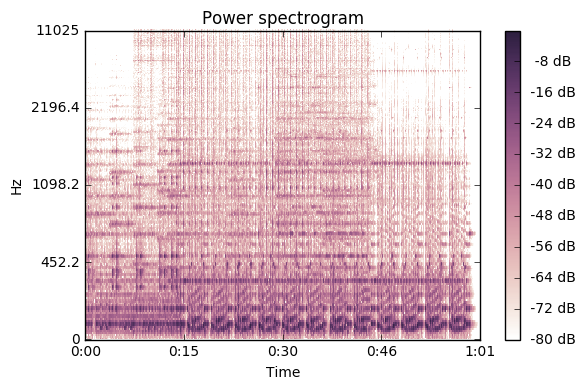

In [24]:
plt.show()
# plt.savefig('image.png')

In [103]:
import librosa
import numpy as np

z, sr = librosa.load('/Users/rileyedmunds/Desktop/helicopter1.ogg')

# stft = librosa.stft(z)
stft = librosa.core.stft(z, n_fft=1024, hop_length=512, dtype=np.complex128)
no_phase = librosa.core.stft(z, n_fft=1024, hop_length=512, dtype=np.complex128)

#zero phase one a copy of stft
no_phase.imag = np.zeros(no_phase.imag.shape)

#check phase is zeroed
print(stft.imag.max())
print(no_phase.imag.max())

#inverse each one
istft_nophase = librosa.core.istft(no_phase)
istft = librosa.core.istft(stft)

#another check
istft_nophase.dtype == istft.dtype


#ouput inverse with phase
librosa.output.write_wav('/Users/rileyedmunds/Desktop/heli1_with_phase.wav', istft, sr)

#ouput inverse without phase
librosa.output.write_wav('/Users/rileyedmunds/Desktop/heli1_without_phase.wav', istft_nophase, sr)

38.3739621882
0.0


In [104]:
#zero phase one a copy of stft
no_phase.imag = np.zeros(no_phase.imag.shape)


#ouput inverse with phase
librosa.output.write_wav('/Users/rileyedmunds/Desktop/heli1_with_phase.wav', istft, sr)

#ouput inverse without phase
librosa.output.write_wav('/Users/rileyedmunds/Desktop/heli1_without_phase.wav', istft_nophase, sr)

In [91]:
print(stft.imag.max())
print(no_phase.imag.max())


97.7076
0.0


In [92]:
#inverse each one
istft_nophase = librosa.core.istft(no_phase)
istft = librosa.core.istft(stft)

In [93]:
istft_nophase.dtype == istft.dtype

True

In [96]:
#ouput inverse with phase
librosa.output.write_wav('/Users/rileyedmunds/Desktop/water_with_phase.wav', istft, sr)

#ouput inverse without phase
librosa.output.write_wav('/Users/rileyedmunds/Desktop/water_without_phase.wav', istft_nophase, sr)


# #ouput inverse with phase
# librosa.output.write_wav('/Users/rileyedmunds/Desktop/inverse_with_phase.wav', istft, sr)

# #ouput inverse without phase
# librosa.output.write_wav('/Users/rileyedmunds/Desktop/inverse_without_phase.wav', istft_nophase, sr)

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(z, sr=sr, n_mels=60)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# librosa.display.specshow(librosa.logamplitude(np.abs(M)**2, ref_power=np.max),y_axis='log', x_axis='time')
# 
librosa.display.specshow(np.abs(S)**2,y_axis='log', x_axis='time')


plt.title('Log-scaled Mel Spectrogram (Church Bells)')
plt.colorbar(format='%+4f dB')
plt.tight_layout()

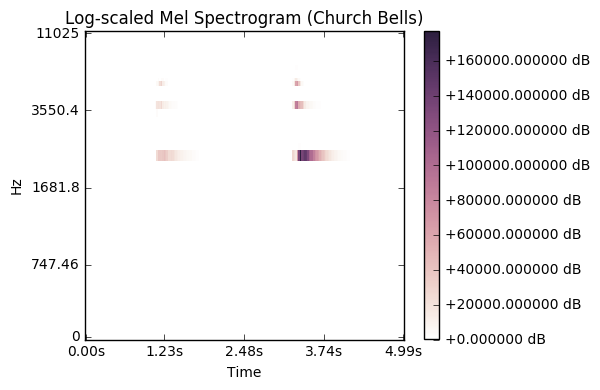

In [94]:
plt.show()

In [101]:
# import numpy as np
# import matplotlib.pyplot as plt
# librosa.display.specshow(librosa.logamplitude(M, ref_power=np.max),y_axis='log', x_axis='time')

# plt.title('Log-scaled Mel Spectrogram (Church Bells)')
# plt.colorbar(format='%+4.0f dB')
# plt.tight_layout()
# plt.show()

In [126]:
# plt.subplot(4, 2, 2)
librosa.display.specshow(S, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency Mel Spectrogram')
plt.tight_layout()


/Users/rileyedmunds/anaconda3/lib/python3.5/site-packages/librosa/display.py:677: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


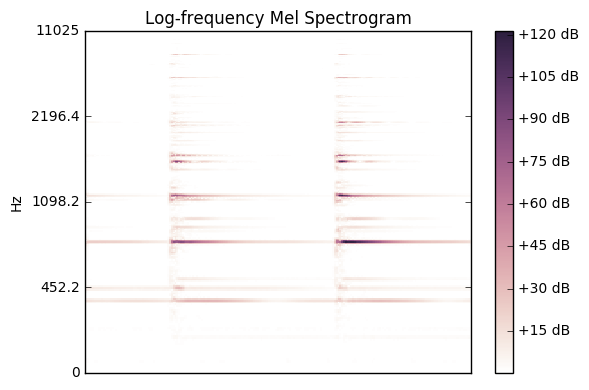

In [127]:
plt.show()

/Users/rileyedmunds/anaconda3/lib/python3.5/site-packages/librosa/display.py:677: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


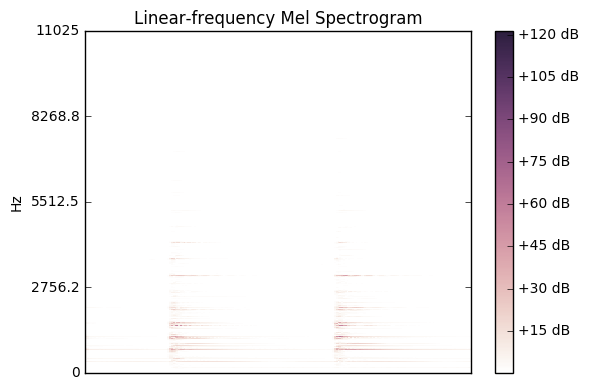

In [141]:
# plt.subplot(4, 2, 2)
librosa.display.specshow(S, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency Mel Spectrogram')
plt.tight_layout()
plt.show()

In [145]:
import numpy as np
import matplotlib.pyplot as plt

# Let's make and display a mel-scaled power (energy-squared) spectrogram
l = librosa.feature.melspectrogram(z, sr=sr, n_mels=60)
S = librosa.stft(z)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# librosa.display.specshow(librosa.logamplitude(np.abs(M)**2, ref_power=np.max),y_axis='log', x_axis='time')
# 
librosa.display.specshow(np.abs(log_S)**2,y_axis='log', x_axis='time')


plt.title('Log Scaled Mel STFT (Church Bells)')
plt.colorbar(format='%+4f dB')
plt.tight_layout()

In [140]:
plt.show()

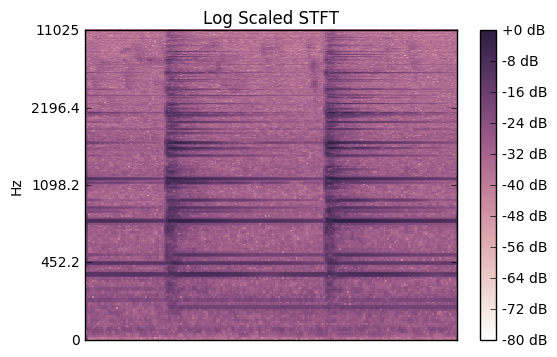

In [147]:
D = librosa.logamplitude(librosa.stft(z)), ref_power=np.max)
# plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log Scaled STFT')
plt.show()

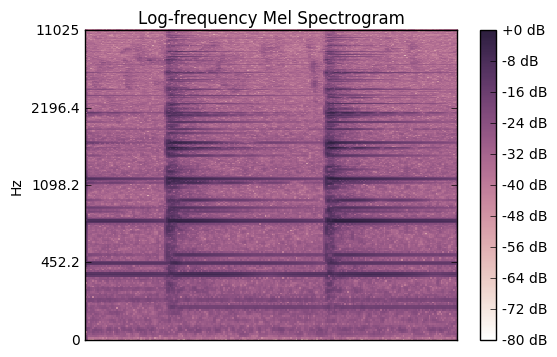

In [148]:
# plt.subplot(4, 2, 2)
librosa.display.specshow(log_S, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency Mel Spectrogram')
# plt.tight_layout()
plt.show()